In [24]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np
# load dataset
(trainX, trainy), _ = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)


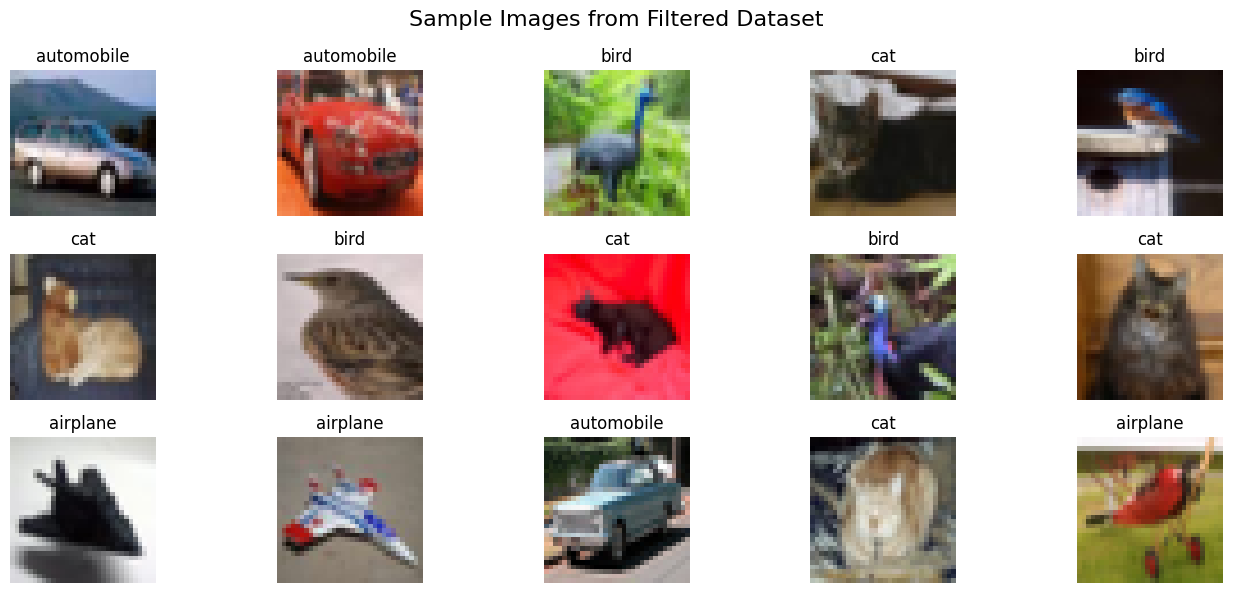

In [25]:
# Filter dataset for selected classes
selected_classes = ["airplane", "automobile", "bird", "cat"]
selected_indices = [label_names.index(cls) for cls in selected_classes]

filtered_X = trainX[np.isin(trainy, selected_indices).flatten()]
filtered_y = trainy[np.isin(trainy, selected_indices).flatten()]

# Map filtered labels to class names
filtered_y_labels = np.array([label_names[label[0]] for label in filtered_y])

# Visualize some samples with their labels
fig, axes = plt.subplots(3, 5, figsize=(14, 6))
fig.suptitle("Sample Images from Filtered Dataset", fontsize=16)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(filtered_X[i])
    ax.set_title(filtered_y_labels[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

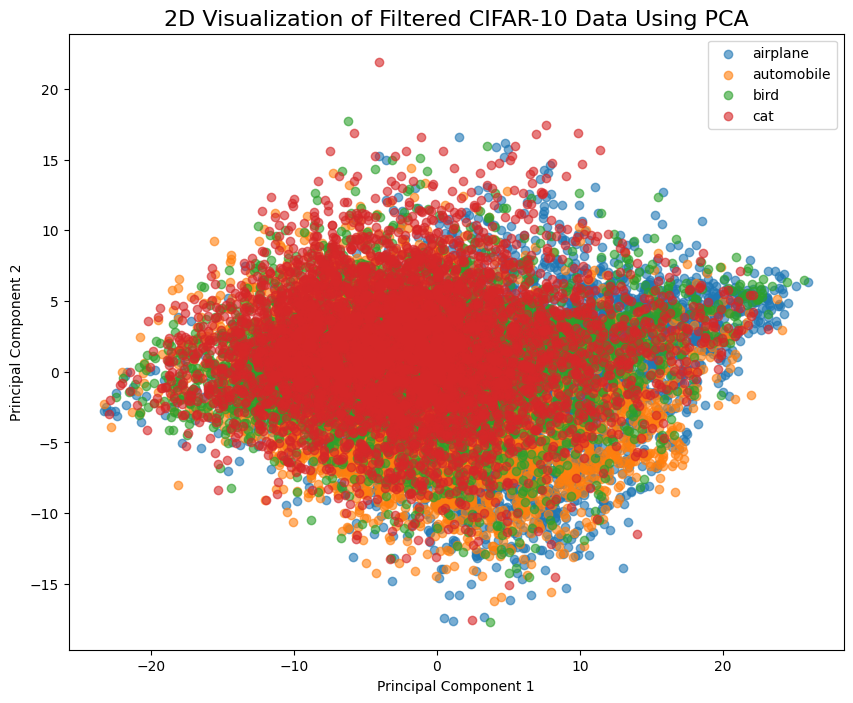

In [26]:
from sklearn.decomposition import PCA

# Step 3: Normalize the data
filtered_X_normalized = filtered_X.astype('float32') / 255.0

# Reshape data for PCA (flatten each image into a 1D array)
n_samples = filtered_X_normalized.shape[0]
flattened_X = filtered_X_normalized.reshape(n_samples, -1)

# Step 4: Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_X)

# Visualize the data in 2D
plt.figure(figsize=(10, 8))
for cls in selected_classes:
    class_idx = np.where(filtered_y_labels == cls)[0]
    plt.scatter(pca_result[class_idx, 0], pca_result[class_idx, 1], label=cls, alpha=0.6)

plt.title("2D Visualization of Filtered CIFAR-10 Data Using PCA", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# K-means on normalized data
kmeans_basic = KMeans(n_clusters=len(selected_classes), random_state=42)
kmeans_basic_labels = kmeans_basic.fit_predict(flattened_X)
print(kmeans_basic_labels)

# K-means with PCA (retain 95% variance)
pca_95 = PCA(n_components=0.95)
pca_95_data = pca_95.fit_transform(flattened_X)
kmeans_pca_95 = KMeans(n_clusters=len(selected_classes), random_state=42)
kmeans_pca_95_labels = kmeans_pca_95.fit_predict(pca_95_data)
print(kmeans_pca_95_labels)
# K-means with LDA (3 components)
lda = LDA(n_components=3)
lda_data = lda.fit_transform(flattened_X, filtered_y.flatten())  # Requires labeled data
kmeans_lda = KMeans(n_clusters=len(selected_classes), random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(lda_data)
print(kmeans_lda_labels)

# Visualize clustering
def visualize_clustering(data_2d, labels, title):
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = data_2d[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label}", alpha=0.6)
    plt.title(title, fontsize=16)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

# Reduce data to 2D for visualization
pca_2d = PCA(n_components=2)
flattened_X_2d = pca_2d.fit_transform(flattened_X)

# Visualize basic K-means
visualize_clustering(flattened_X_2d, kmeans_basic_labels, "K-means on Normalized Data")

# Visualize K-means with PCA (95% variance)
pca_95_2d = pca_2d.fit_transform(pca_95_data)
visualize_clustering(pca_95_2d, kmeans_pca_95_labels, "K-means with PCA (95% Variance)")

# Visualize K-means with LDA
lda_2d = pca_2d.fit_transform(lda_data)
visualize_clustering(lda_2d, kmeans_lda_labels, "K-means with LDA (3 Components)")


[3 1 2 ... 3 0 3]


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin scores for each model
db_score_basic = davies_bouldin_score(flattened_X, kmeans_basic_labels)
db_score_pca_95 = davies_bouldin_score(pca_95_data, kmeans_pca_95_labels)
db_score_lda = davies_bouldin_score(lda_data, kmeans_lda_labels)

# Display the results
print("Davies-Bouldin Scores:")
print(f"K-means on Normalized Data: {db_score_basic:.4f}")
print(f"K-means with PCA (95% Variance): {db_score_pca_95:.4f}")
print(f"K-means with LDA (3 Components): {db_score_lda:.4f}")


Davies-Bouldin Scores:
K-means on Normalized Data: 2.4524
K-means with PCA (95% Variance): 2.3578
K-means with LDA (3 Components): 1.0627



Confusion Matrix for K-means on Normalized Data:



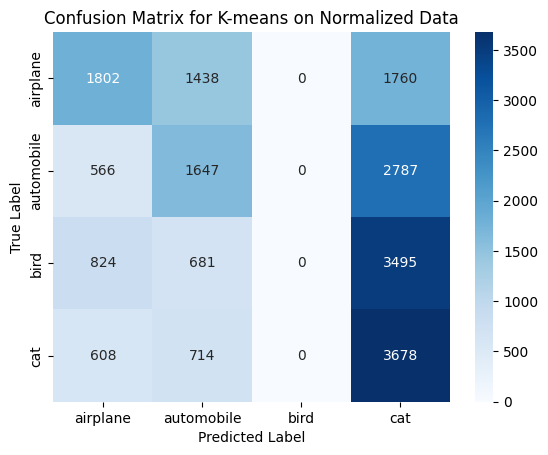


Classification Report for K-means on Normalized Data:

              precision    recall  f1-score   support

    airplane       0.47      0.36      0.41      5000
  automobile       0.37      0.33      0.35      5000
        bird       0.00      0.00      0.00      5000
         cat       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000


Confusion Matrix for K-means with PCA (95% Variance):



c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


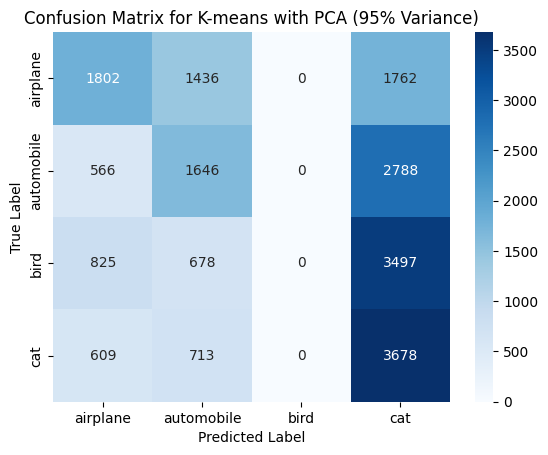


Classification Report for K-means with PCA (95% Variance):

              precision    recall  f1-score   support

    airplane       0.47      0.36      0.41      5000
  automobile       0.37      0.33      0.35      5000
        bird       0.00      0.00      0.00      5000
         cat       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000


Confusion Matrix for K-means with LDA (3 Components):



c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


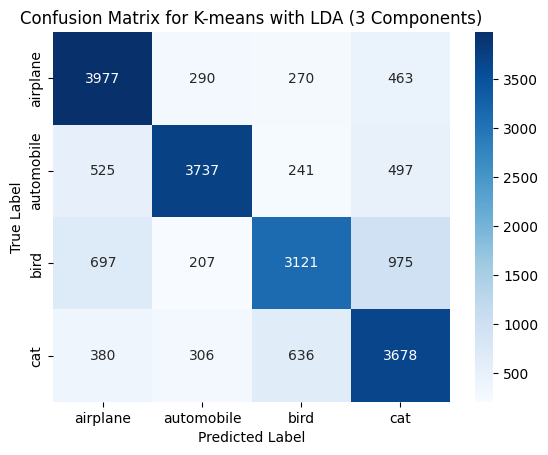


Classification Report for K-means with LDA (3 Components):

              precision    recall  f1-score   support

    airplane       0.71      0.80      0.75      5000
  automobile       0.82      0.75      0.78      5000
        bird       0.73      0.62      0.67      5000
         cat       0.66      0.74      0.69      5000

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000



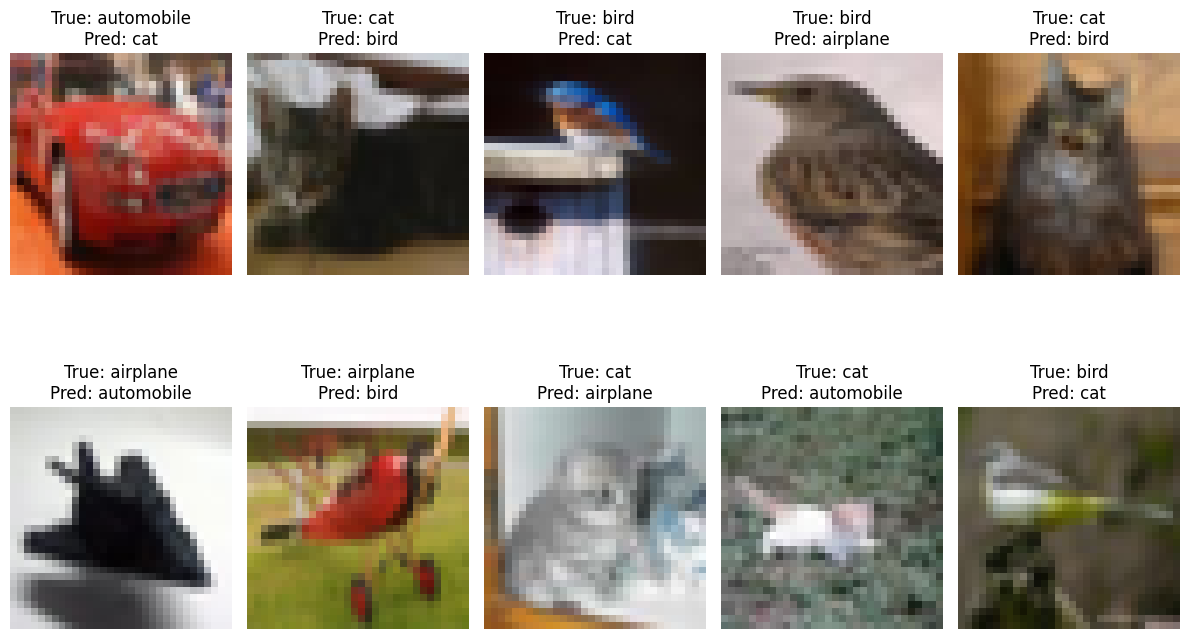

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Map cluster labels to true labels using majority voting
def map_clusters_to_labels(cluster_labels, true_labels):
    label_mapping = {}
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        indices = np.where(cluster_labels == cluster)
        true_cluster_labels = true_labels[indices]
        most_common_label = np.bincount(true_cluster_labels.flatten()).argmax()
        label_mapping[cluster] = most_common_label
    return np.array([label_mapping[label] for label in cluster_labels])

# Map and evaluate all models
models = {
    "K-means on Normalized Data": kmeans_basic_labels,
    "K-means with PCA (95% Variance)": kmeans_pca_95_labels,
    "K-means with LDA (3 Components)": kmeans_lda_labels,
}

for model_name, cluster_labels in models.items():
    predicted_labels = map_clusters_to_labels(cluster_labels, filtered_y)
    cm = confusion_matrix(filtered_y.flatten(), predicted_labels)
    print(f"\nConfusion Matrix for {model_name}:\n")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(filtered_y.flatten(), predicted_labels, target_names=selected_classes))

# Step 9: Visualize misclassifications for the best model
best_model = "K-means with LDA (3 Components)"  # Replace based on results
best_labels = models[best_model]
predicted_labels = map_clusters_to_labels(best_labels, filtered_y)

# Find misclassified examples
misclassified_indices = np.where(predicted_labels != filtered_y.flatten())[0]

# Display a few misclassified images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:10]):  # Display first 10 misclassifications
    plt.subplot(2, 5, i + 1)
    plt.imshow(filtered_X[idx])
    plt.title(f"True: {label_names[filtered_y[idx][0]]}\nPred: {label_names[predicted_labels[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0606
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0410
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0360
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0328
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0311
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0297
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0287
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0277
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0270
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0263
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0256
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0251
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0243
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0239
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0235
Epoc

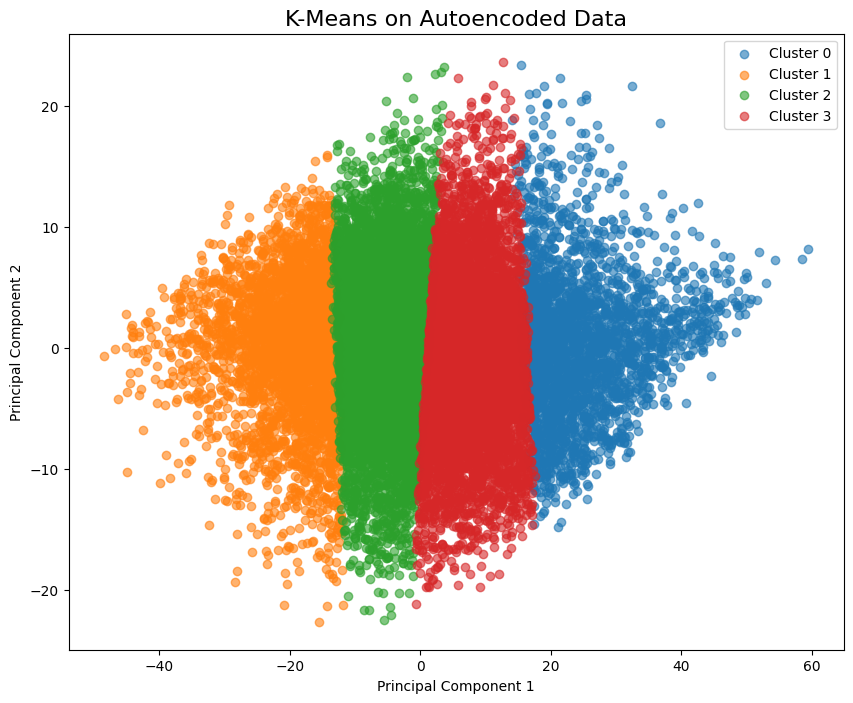

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Reshape, Input
from sklearn.preprocessing import StandardScaler

# Step 1: Train an Autoencoder for Dimensionality Reduction
input_dim = flattened_X.shape[1]
encoding_dim = 50  # Dimension for encoded features

# Autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(flattened_X, flattened_X, epochs=20, batch_size=256, shuffle=True, verbose=1)

# Use encoder part for dimensionality reduction
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_X = encoder_model.predict(flattened_X)

# Step 2: K-Means on Autoencoded Data
kmeans_auto = KMeans(n_clusters=len(selected_classes), random_state=42, n_init=20, max_iter=300)
kmeans_auto_labels = kmeans_auto.fit_predict(encoded_X)

# Evaluate using Davies-Bouldin score
db_score_auto = davies_bouldin_score(encoded_X, kmeans_auto_labels)
print(f"Davies-Bouldin Score (Autoencoder + K-Means): {db_score_auto:.4f}")

# Visualize clustering results
pca_2d_auto = PCA(n_components=2)
encoded_X_2d = pca_2d_auto.fit_transform(encoded_X)
visualize_clustering(encoded_X_2d, kmeans_auto_labels, "K-Means on Autoencoded Data")
